In [1]:
from matplotlib import pyplot
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense

In [2]:
X,Y=make_moons(n_samples=100,noise=0.2,random_state=1)
n_train=30
trainX,testX=X[:n_train,:],X[n_train:]
trainY,testY=Y[:n_train],Y[n_train:]

In [3]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(30, 2)
(30,)
(70, 2)
(70,)


In [4]:
model=Sequential()
model.add(Dense(500,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               1500      
                                                                 
 dense_1 (Dense)             (None, 1)                 501       
                                                                 
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


In [6]:
history=model.fit(trainX,trainY,validation_data=(testX,testY),epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.6782 - accuracy: 0.5333 - val_loss: 0.6755 - val_accuracy: 0.5571
Epoch 2/100
1/1 [==============================] - 0s 65ms/step - loss: 0.6614 - accuracy: 0.8000 - val_loss: 0.6650 - val_accuracy: 0.6571
Epoch 3/100
1/1 [==============================] - 0s 69ms/step - loss: 0.6451 - accuracy: 0.8000 - val_loss: 0.6548 - val_accuracy: 0.6857
Epoch 4/100
1/1 [==============================] - 0s 61ms/step - loss: 0.6292 - accuracy: 0.8333 - val_loss: 0.6451 - val_accuracy: 0.6857
Epoch 5/100
1/1 [==============================] - 0s 63ms/step - loss: 0.6138 - accuracy: 0.8333 - val_loss: 0.6357 - val_accuracy: 0.6857
Epoch 6/100
1/1 [==============================] - 0s 62ms/step - loss: 0.5989 - accuracy: 0.8333 - val_loss: 0.6266 - val_accuracy: 0.6857
Epoch 7/100
1/1 [==============================] - 0s 58ms/step - loss: 0.5844 - accuracy: 0.8667 - val_loss: 0.6179 - val_accuracy: 0.7000
Epoch 8/100
1/1 [=====

1/1 [==============================] - 0s 59ms/step - loss: 0.2354 - accuracy: 0.8667 - val_loss: 0.4514 - val_accuracy: 0.7429
Epoch 60/100
1/1 [==============================] - 0s 61ms/step - loss: 0.2332 - accuracy: 0.8667 - val_loss: 0.4506 - val_accuracy: 0.7429
Epoch 61/100
1/1 [==============================] - 0s 65ms/step - loss: 0.2312 - accuracy: 0.8667 - val_loss: 0.4498 - val_accuracy: 0.7429
Epoch 62/100
1/1 [==============================] - 0s 62ms/step - loss: 0.2292 - accuracy: 0.8667 - val_loss: 0.4490 - val_accuracy: 0.7429
Epoch 63/100
1/1 [==============================] - 0s 64ms/step - loss: 0.2273 - accuracy: 0.8667 - val_loss: 0.4482 - val_accuracy: 0.7429
Epoch 64/100
1/1 [==============================] - 0s 70ms/step - loss: 0.2255 - accuracy: 0.8667 - val_loss: 0.4474 - val_accuracy: 0.7429
Epoch 65/100
1/1 [==============================] - 0s 67ms/step - loss: 0.2237 - accuracy: 0.8667 - val_loss: 0.4467 - val_accuracy: 0.7429
Epoch 66/100
1/1 [========

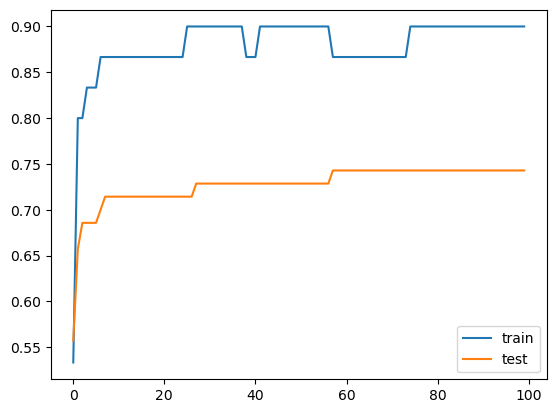

In [7]:
pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend()
pyplot.show()

In [8]:
# After 75 epochs it started overfitting by giving same validation accuracy on the test data, so let us use regularization technique 

In [9]:
from keras.regularizers import l2

In [10]:
model=Sequential()
model.add(Dense(500,input_dim=2,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 500)               1500      
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
history=model.fit(trainX,trainY,validation_data=(testX,testY),epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.7149 - accuracy: 0.1667 - val_loss: 0.6974 - val_accuracy: 0.5429
Epoch 2/100
1/1 [==============================] - 0s 65ms/step - loss: 0.6982 - accuracy: 0.6333 - val_loss: 0.6867 - val_accuracy: 0.6143
Epoch 3/100
1/1 [==============================] - 0s 66ms/step - loss: 0.6818 - accuracy: 0.8667 - val_loss: 0.6763 - val_accuracy: 0.7000
Epoch 4/100
1/1 [==============================] - 0s 62ms/step - loss: 0.6659 - accuracy: 0.8667 - val_loss: 0.6663 - val_accuracy: 0.7143
Epoch 5/100
1/1 [==============================] - 0s 64ms/step - loss: 0.6505 - accuracy: 0.8667 - val_loss: 0.6567 - val_accuracy: 0.7143
Epoch 6/100
1/1 [==============================] - 0s 63ms/step - loss: 0.6355 - accuracy: 0.8667 - val_loss: 0.6474 - val_accuracy: 0.7143
Epoch 7/100
1/1 [==============================] - 0s 59ms/step - loss: 0.6210 - accuracy: 0.8667 - val_loss: 0.6384 - val_accuracy: 0.7143
Epoch 8/100
1/1 [=====

1/1 [==============================] - 0s 52ms/step - loss: 0.2487 - accuracy: 0.8667 - val_loss: 0.4516 - val_accuracy: 0.7429
Epoch 60/100
1/1 [==============================] - 0s 56ms/step - loss: 0.2463 - accuracy: 0.8667 - val_loss: 0.4509 - val_accuracy: 0.7429
Epoch 61/100
1/1 [==============================] - 0s 49ms/step - loss: 0.2441 - accuracy: 0.8667 - val_loss: 0.4503 - val_accuracy: 0.7429
Epoch 62/100
1/1 [==============================] - 0s 61ms/step - loss: 0.2420 - accuracy: 0.8667 - val_loss: 0.4498 - val_accuracy: 0.7429
Epoch 63/100
1/1 [==============================] - 0s 58ms/step - loss: 0.2399 - accuracy: 0.8667 - val_loss: 0.4492 - val_accuracy: 0.7429
Epoch 64/100
1/1 [==============================] - 0s 56ms/step - loss: 0.2379 - accuracy: 0.8667 - val_loss: 0.4487 - val_accuracy: 0.7429
Epoch 65/100
1/1 [==============================] - 0s 62ms/step - loss: 0.2360 - accuracy: 0.8667 - val_loss: 0.4482 - val_accuracy: 0.7429
Epoch 66/100
1/1 [========

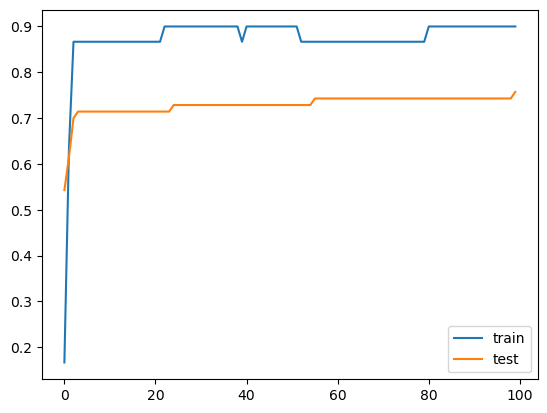

In [14]:
pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend()
pyplot.show()

Lets apply l1 and l2 together to the model using below code

In [15]:
from keras.regularizers import l1_l2

In [16]:
model=Sequential()
model.add(Dense(500,input_dim=2,activation='relu',kernel_regularizer=l1_l2(l1=0.001,l2=0.001)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               1500      
                                                                 
 dense_5 (Dense)             (None, 1)                 501       
                                                                 
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


In [18]:
history=model.fit(trainX,trainY,validation_data=(testX,testY),epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.7544 - accuracy: 0.4000 - val_loss: 0.7380 - val_accuracy: 0.8143
Epoch 2/100
1/1 [==============================] - 0s 64ms/step - loss: 0.7374 - accuracy: 0.8667 - val_loss: 0.7271 - val_accuracy: 0.8000
Epoch 3/100
1/1 [==============================] - 0s 64ms/step - loss: 0.7208 - accuracy: 0.8667 - val_loss: 0.7166 - val_accuracy: 0.7857
Epoch 4/100
1/1 [==============================] - 0s 62ms/step - loss: 0.7048 - accuracy: 0.8667 - val_loss: 0.7065 - val_accuracy: 0.7571
Epoch 5/100
1/1 [==============================] - 0s 62ms/step - loss: 0.6892 - accuracy: 0.8667 - val_loss: 0.6968 - val_accuracy: 0.7429
Epoch 6/100
1/1 [==============================] - 0s 63ms/step - loss: 0.6741 - accuracy: 0.8667 - val_loss: 0.6874 - val_accuracy: 0.7429
Epoch 7/100
1/1 [==============================] - 0s 66ms/step - loss: 0.6594 - accuracy: 0.9000 - val_loss: 0.6784 - val_accuracy: 0.7286
Epoch 8/100
1/1 [=====

1/1 [==============================] - 0s 61ms/step - loss: 0.3086 - accuracy: 0.9000 - val_loss: 0.5106 - val_accuracy: 0.7429
Epoch 60/100
1/1 [==============================] - 0s 59ms/step - loss: 0.3065 - accuracy: 0.9000 - val_loss: 0.5096 - val_accuracy: 0.7429
Epoch 61/100
1/1 [==============================] - 0s 60ms/step - loss: 0.3044 - accuracy: 0.9000 - val_loss: 0.5087 - val_accuracy: 0.7429
Epoch 62/100
1/1 [==============================] - 0s 61ms/step - loss: 0.3024 - accuracy: 0.9000 - val_loss: 0.5077 - val_accuracy: 0.7429
Epoch 63/100
1/1 [==============================] - 0s 66ms/step - loss: 0.3005 - accuracy: 0.9000 - val_loss: 0.5068 - val_accuracy: 0.7429
Epoch 64/100
1/1 [==============================] - 0s 67ms/step - loss: 0.2987 - accuracy: 0.9000 - val_loss: 0.5058 - val_accuracy: 0.7429
Epoch 65/100
1/1 [==============================] - 0s 63ms/step - loss: 0.2969 - accuracy: 0.9000 - val_loss: 0.5048 - val_accuracy: 0.7429
Epoch 66/100
1/1 [========

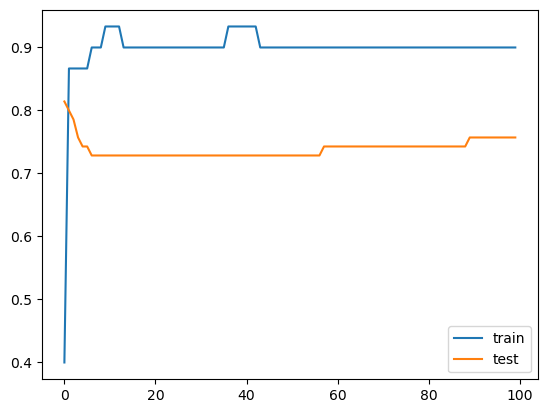

In [19]:
pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend()
pyplot.show()